# Analyzing Covid-19 Data In Austria

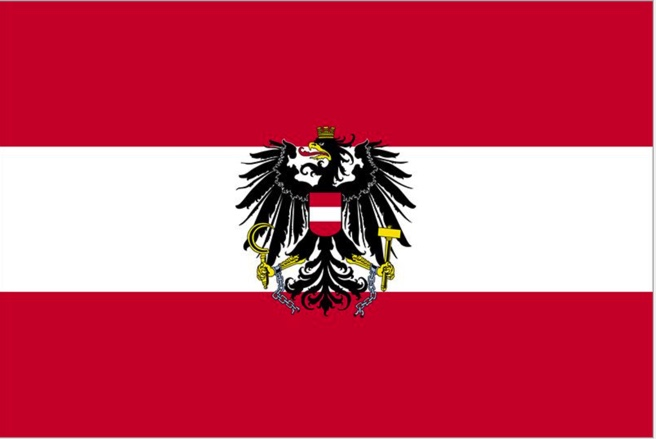

# Covid-19 Background

Covid-19 is caused by the virus, SARS-CoV-2, and hit the world hard in 2020. Common symoptoms include a cough, fever, fatigue, loss of smell/taste, shortness of breath, and body aches. As of May 7, 2022 there have been over 517 million cases and 6.25 million dealths at the hands of the Coronavirus. For over a year a majority of the world was shut down; schools and stores were closed, you were not able to see your friends and family, and millions were left without a job. On December 11 of 2020, the Pfizer Vaccine was released followed by Moderna and Johnson and Johnson. Slowly, our world has been moving back to normalcy; never forgetting this pandemic.

## Data Source

The data is downloaded from [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide) 

In [1]:
%matplotlib inline
import pandas 

## A Quick View of The Data

In [2]:
df = pandas.read_excel('s3://trojanowski-ia241/covid_data.xls')
df[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12 00:00:00,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-11-12 00:00:00,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-10-12 00:00:00,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,2020-09-12 00:00:00,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,2020-08-12 00:00:00,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,2020-07-12 00:00:00,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,2020-06-12 00:00:00,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,2020-05-12 00:00:00,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


In [4]:
pandas.unique(df['countriesAndTerritories'])

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Er

In [5]:
Austria_data = df.loc[df['countriesAndTerritories'] == 'Austria']
Austria_data[:10] #the top 10 rows

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
3284,14/12/2020,14,12,2020,3005,45,Austria,AT,AUT,8858775.0,Europe,472.458099
3285,13/12/2020,13,12,2020,2938,96,Austria,AT,AUT,8858775.0,Europe,482.640094
3286,2020-12-12 00:00:00,12,12,2020,3026,101,Austria,AT,AUT,8858775.0,Europe,503.263713
3287,2020-11-12 00:00:00,11,12,2020,2466,125,Austria,AT,AUT,8858775.0,Europe,523.492244
3288,2020-10-12 00:00:00,10,12,2020,2913,126,Austria,AT,AUT,8858775.0,Europe,557.142494
3289,2020-09-12 00:00:00,9,12,2020,2531,80,Austria,AT,AUT,8858775.0,Europe,590.815322
3290,2020-08-12 00:00:00,8,12,2020,2181,95,Austria,AT,AUT,8858775.0,Europe,608.921662
3291,2020-07-12 00:00:00,7,12,2020,2745,58,Austria,AT,AUT,8858775.0,Europe,619.182675
3292,2020-06-12 00:00:00,6,12,2020,3160,87,Austria,AT,AUT,8858775.0,Europe,647.064634
3293,2020-05-12 00:00:00,5,12,2020,3634,140,Austria,AT,AUT,8858775.0,Europe,681.821132


## How do the number of cases vs deaths compare?

<AxesSubplot:xlabel='cases', ylabel='deaths'>

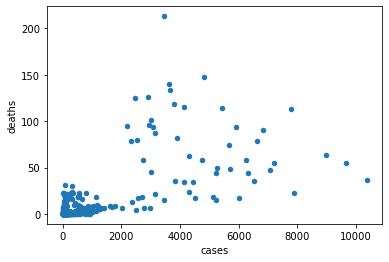

In [7]:
Austria_data.plot.scatter(x='cases',y='deaths')

As the amount of cases increase, the amount of deaths decrease. The highest number of deaths occurs between 0 and 2,000 cases. These two variables have an inverse relationship, which was suprising to me.

## How have The Covid-19 Death Rates Progressed Over Time?

<AxesSubplot:xlabel='month'>

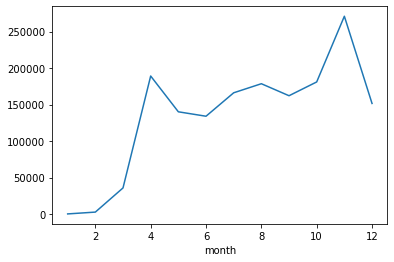

In [8]:
sum_death_by_date = df.groupby('month').sum()['deaths']

sum_death_by_date.plot()

Within the year there were two large peaks in deaths. Around the four month mark the number of deaths reached almost 200,000 and at the eleven month mark the deaths surpasses 250,000. Since the last peak at eleven months, the number of deaths have been on a decline.

## How Many Confirmed Cases Did Austria Have and What Months Had The Highest Cases?

In [15]:
Austria_data.sum()['cases']

320036

<AxesSubplot:xlabel='month'>

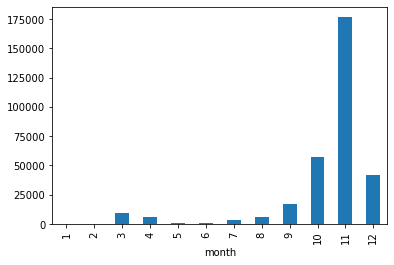

In [13]:
sum_cases_per_month = Austria_data.groupby('month').sum()['cases']
sum_cases_per_month.plot.bar()

Aruba had a total of 320,026 confirmed cases of the Coronavirus. There were no cases in the first and second month, while the tenth and eleventh months had the highest case numbers.The eleventh month reached a high of 175,000 cases which is most positive cases in a month within Austria.

## Conclusions and Limitations

While analyzing this data, we were limited to statistics from two years ago. Having access to more recent data would help me to understand how Austria is recovering from the pandemic and whether or not they have a high caseload. I also do not have  sufficent knowledge on the country of Austria and their norms. In conclusion, Austria was not one of the countries hit by Covid-19 the hardest, though losing 4,400 people. 